In [2]:
import pandas as pd
from scipy.signal import butter, lfilter, welch
from sklearn.decomposition import FastICA
import numpy as np


In [6]:

# Function definitions
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

def extract_features(data, fs):
    features = []
    for channel in data.T:  # Transpose to iterate over channels
        # Calculate Power Spectral Density (PSD)
        freqs, psd = welch(channel, fs, nperseg=256)
        log_psd = np.log(psd)  # Use log of PSD values as features
        features.append(log_psd)
    return np.array(features).flatten()



In [7]:
openbci_data_path = "openbci_meditation.csv"

In [8]:
# Load the CSV file without headers
try:
    data = pd.read_csv(openbci_data_path, header=None)
    print("CSV file loaded successfully.")
    print("Data shape before slicing:", data.shape)
except FileNotFoundError:
    print("CSV file not found. Please check the file path.")
    exit()
except ValueError as ve:
    print(f"Error reading CSV file: {ve}")
    exit()

data.head()

CSV file loaded successfully.
Data shape before slicing: (175952, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,45997.52,37487.45,-22369.71,-26183.10,-12716.55,-24777.78,-10055.49,-3746.69,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889071,12:14:49.071
1,2,46077.20,37578.29,-22259.92,-26035.54,-12632.74,-24711.80,-9977.57,-3650.20,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889071,12:14:49.071
2,3,46157.87,37690.05,-22231.69,-25992.17,-12616.84,-24741.10,-9976.90,-3649.79,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
3,4,46112.07,37644.58,-22285.94,-26075.70,-12653.59,-24794.54,-10017.76,-3706.21,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
4,5,46002.86,37500.39,-22366.29,-26191.93,-12712.46,-24778.41,-10044.25,-3734.91,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889089,12:14:49.089


In [9]:
# Drop the first column (timer)
try:
    data = data.iloc[:, 1:]  # Drop the first column
    print("Data shape after dropping timer column:", data.shape)
except IndexError as ie:
    print("Error dropping timer column:", ie)
    exit()
    
data.head()

Data shape after dropping timer column: (175952, 23)


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,45997.52,37487.45,-22369.71,-26183.10,-12716.55,-24777.78,-10055.49,-3746.69,0.014,0.826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889071,12:14:49.071
1,46077.20,37578.29,-22259.92,-26035.54,-12632.74,-24711.80,-9977.57,-3650.20,0.014,0.826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889071,12:14:49.071
2,46157.87,37690.05,-22231.69,-25992.17,-12616.84,-24741.10,-9976.90,-3649.79,0.014,0.826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
3,46112.07,37644.58,-22285.94,-26075.70,-12653.59,-24794.54,-10017.76,-3706.21,0.014,0.826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889079,12:14:49.079
4,46002.86,37500.39,-22366.29,-26191.93,-12712.46,-24778.41,-10044.25,-3734.91,0.014,0.826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557936889089,12:14:49.089


In [10]:
# Take the next 8 columns after dropping the timer column
try:
    data = data.iloc[:, :8]
    print("Data shape after slicing:", data.shape)
except IndexError as ie:
    print("Error slicing data:", ie)
    exit()

data.head()

Data shape after slicing: (175952, 8)


,1,2,3,4,5,6,7,8
0,45997.52,37487.45,-22369.71,-26183.10,-12716.55,-24777.78,-10055.49,-3746.69
1,46077.20,37578.29,-22259.92,-26035.54,-12632.74,-24711.80,-9977.57,-3650.20
2,46157.87,37690.05,-22231.69,-25992.17,-12616.84,-24741.10,-9976.90,-3649.79
3,46112.07,37644.58,-22285.94,-26075.70,-12653.59,-24794.54,-10017.76,-3706.21
4,46002.86,37500.39,-22366.29,-26191.93,-12712.46,-24778.41,-10044.25,-3734.91


In [11]:
# Export the processed data to a new CSV file
try:
    data.to_csv('processed_data.csv', index=False, header=False)
    print("Processed data exported to 'processed_data.csv'.")
except Exception as e:
    print(f"Error exporting processed data: {e}")
    exit()

Processed data exported to 'processed_data.csv'.


In [12]:
# Filter parameters
lowcut = 1.0
highcut = 50.0
fs = 250  # Sampling frequency

# Apply bandpass filter
try:
    filtered_data = bandpass_filter(data.values, lowcut, highcut, fs)
    print("Bandpass filter applied successfully.")
    print("Filtered Data Shape:", filtered_data.shape)
except Exception as e:
    print(f"Error during bandpass filtering: {e}")
    exit()
filtered_data

Bandpass filter applied successfully.
Filtered Data Shape: (175952, 8)


array([[ 9.31633338e+02,  7.59270460e+02, -4.53075896e+02, ...,
        -5.01848923e+02, -2.03663800e+02, -7.58854240e+01],
       [ 6.48072948e+03,  5.28224464e+03, -3.14872745e+03, ...,
        -3.48881055e+03, -1.41481736e+03, -5.25796706e+02],
       [ 2.01431104e+04,  1.64209839e+04, -9.77379388e+03, ...,
        -1.08349925e+04, -4.38967320e+03, -1.62609344e+03],
       ...,
       [ 2.82720101e+01,  1.14533541e+01,  2.58991301e+01, ...,
        -1.53943708e+00,  1.23734564e+01,  1.58849326e+01],
       [ 3.00402419e+01,  9.43174784e+00,  1.87907476e+01, ...,
        -1.24242283e+01,  2.95843742e+00,  3.43233562e+00],
       [ 1.00880842e+01, -1.10377743e+01,  2.36709201e-01, ...,
        -3.24323180e+00, -4.51795593e+00, -3.94116844e+00]])

In [13]:

# Perform ICA
try:
    ica = FastICA(n_components=8, random_state=42)
    ica_data = ica.fit_transform(filtered_data)
    print("ICA applied successfully.")
    print("ICA Data Shape:", ica_data.shape)
except Exception as e:
    print(f"Error during ICA: {e}")
    exit()
ica_data

ICA applied successfully.
ICA Data Shape: (175952, 8)


array([[-0.01663418,  0.01024899, -0.03036816, ...,  0.03388639,
         0.01342153,  0.0534433 ],
       [-0.14847714,  0.0538378 , -0.17407606, ...,  0.20657709,
         0.07256765,  0.26914087],
       [-0.5607501 ,  0.08725836, -0.37226424, ...,  0.50788391,
         0.13325923,  0.44105242],
       ...,
       [ 0.22911419, -0.12939425,  1.93497958, ..., -0.2408293 ,
        -0.24247291, -0.76213791],
       [ 0.62031745, -0.08986178,  1.90788776, ...,  0.01938756,
        -0.1567874 , -0.10147798],
       [-0.05478551,  0.07164405,  1.13868116, ...,  0.52288086,
         0.0833473 ,  0.35525636]])

In [22]:

# Extract features
try:
    features = extract_features(ica_data, fs)
    print("Features extracted successfully.")
    print("Extracted Features Shape:", features.shape)
except Exception as e:
    print(f"Error during feature extraction: {e}")
    exit()
features

Features extracted successfully.
Extracted Features Shape: (1032,)


array([ -4.91326976,  -3.23144288,  -3.12461175, ..., -28.79788307,
       -28.81302277, -29.51123765])

ICA-transformed data (first few rows):
[[-1.66341832e-02  1.02489917e-02 -3.03681627e-02 -2.38576743e+00
  -7.86443768e-02  3.38863881e-02  1.34215341e-02  5.34432964e-02]
 [-1.48477143e-01  5.38377950e-02 -1.74076062e-01 -1.65899159e+01
  -4.66726606e-01  2.06577087e-01  7.25676521e-02  2.69140867e-01]
 [-5.60750105e-01  8.72583554e-02 -3.72264235e-01 -5.15371077e+01
  -1.07550223e+00  5.07883907e-01  1.33259225e-01  4.41052419e-01]
 [-1.13966339e+00 -5.06924920e-02 -2.43330839e-01 -9.49212650e+01
  -9.60069270e-01  5.84340997e-01  1.14276666e-02 -3.78509200e-02]
 [-1.26605571e+00 -3.92327271e-01  4.01044285e-01 -1.16722052e+02
   4.90960737e-01  1.84030522e-01 -3.30645683e-01 -1.06940355e+00]]
Statistical summary of extracted features:
Mean: -14.030536807630716
Standard Deviation: 9.025799219742803
Percentile (25th, 50th, 75th): [-20.58809382 -10.97997783  -6.23747258]


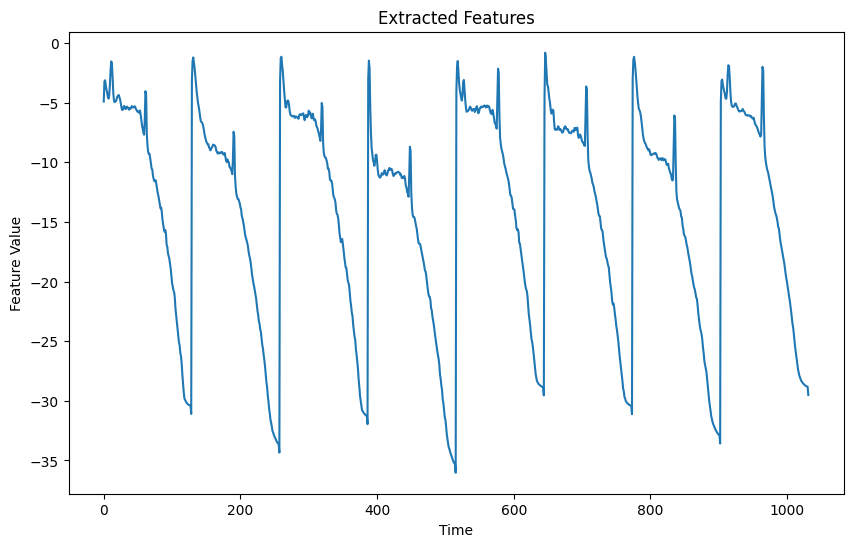

In [23]:

# Print ICA-transformed data
print("ICA-transformed data (first few rows):")
print(ica_data[:5])

# Display statistical summaries of features
print("Statistical summary of extracted features:")
print("Mean:", np.mean(features))
print("Standard Deviation:", np.std(features))
print("Percentile (25th, 50th, 75th):", np.percentile(features, [25, 50, 75]))

# Visualize features (if applicable)
# For example, if features represent a time series, you can plot them:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(features)
plt.title('Extracted Features')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.show()